In [1]:
import os
import pandas as pd
import numpy as np

from PIL import Image

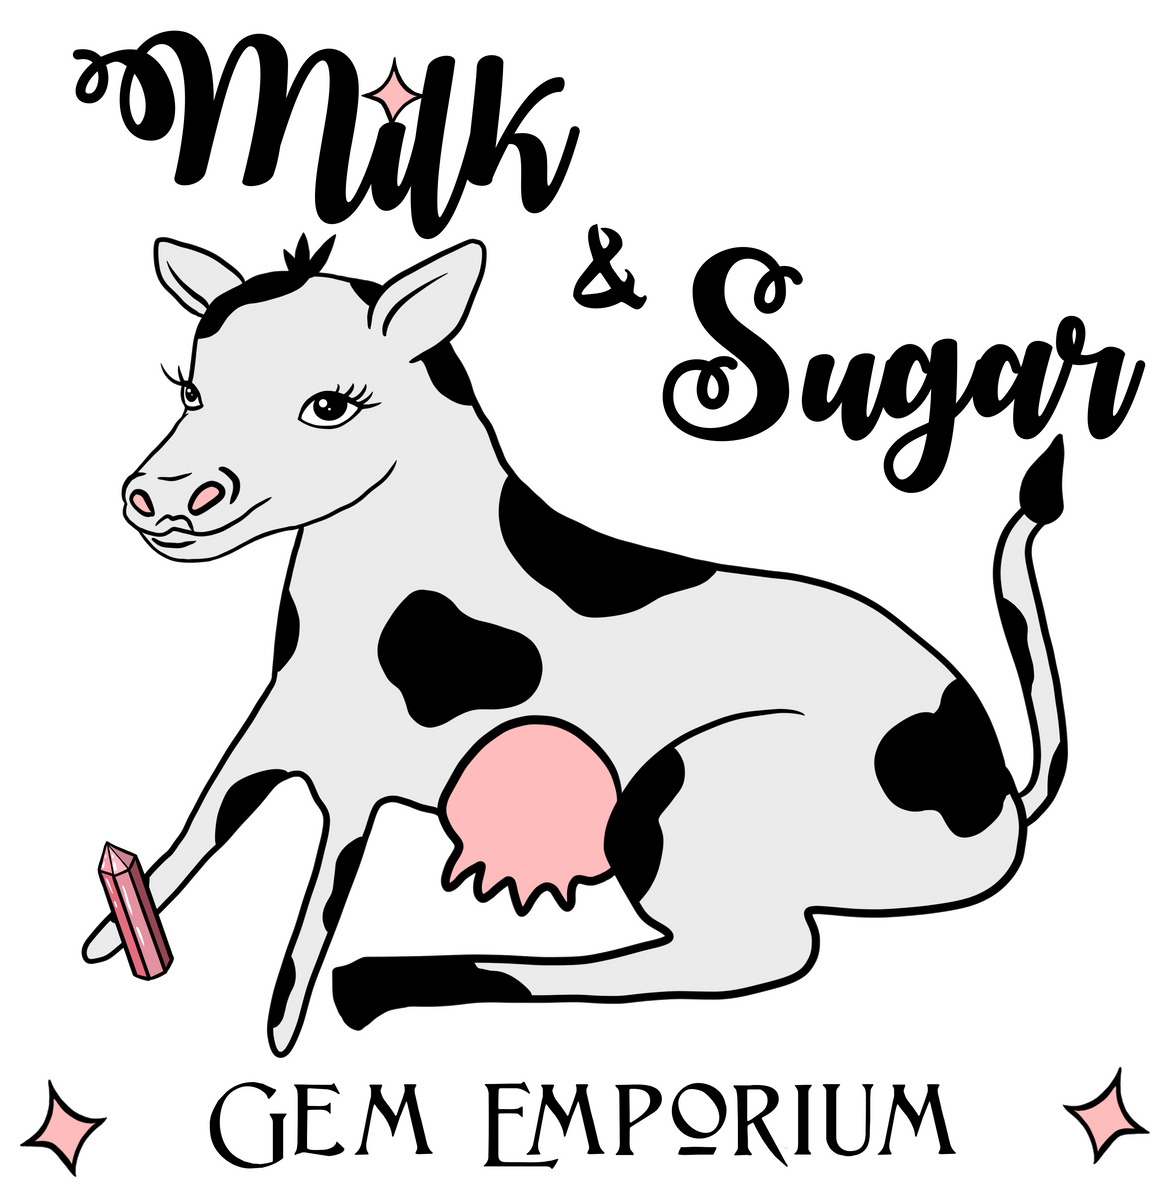

In [2]:
os.chdir(r'/Users/student/Desktop/Data Science/Projects/data/cross-stitch-patternizer/')
msge_im = Image.open('milk_and_sugar_gem_emporium.png')
msge_im

In [3]:
msge_im.size

(1171, 1200)

In [8]:
def find_center(pil_image):
    '''This function finds the center of mass for a user provided image,
       and returns the pixels in the x and y directions that
       have been adjusted for aida counts that are always even.
       Used the answer provided by https://stackoverflow.com/users/5288583/martin-stancsics at
       https://stackoverflow.com/questions/37519238/python-find-center-of-object-in-an-image
       to develop the center of mass equations
       '''
    
    # get original size
    (X, Y) = pil_image.size
    m = np.zeros((X, Y))

    # account for white vs non-white
    m = np.sum(np.asarray(pil_image), -1) < 255*3
    m = m / np.sum(np.sum(m))

    # marginal distributions
    dx = np.sum(m, 0)
    dy = np.sum(m, 1)

    # expected values
    cx = np.sum(dx * np.arange(X))
    cy = np.sum(dy * np.arange(Y))

    # ensure that each returned expected value 
    # will result in an even number 
    # for aida thread count standards
    if round(cx)%2 != 0:
        adj_cx = round(cx) + 1
    else:
        adj_cx = round(cx)
    if round(cy)%2 != 0:
        adj_cy = round(cy) + 1
    else:
        adj_cy = round(cy)
    
    return adj_cx, adj_cy

In [9]:
x_center, y_center = find_center(msge_im)
x_center, y_center

(572, 582)